In [231]:
# Standard 
import numpy as np
import pandas as pd

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Utility
import time

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import clean data

In [232]:
# Time start
start = time.time()

# Load csv-file and display 5 first rows
data = pd.read_csv("clean.csv", sep = ",", index_col="Unnamed: 0")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


# Data for RandomForestClassifier

In [233]:
forest_data = data.copy()

X = forest_data.drop(["Outcome"], axis = 1)
y = forest_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, stratify=y, test_size=0.2)

# Hyperparameter tuning for RandomForestClassifier

In [234]:
scorer = make_scorer(recall_score)

### Hyperparameters

In [235]:
random_search_params = {
    "max_depth": list(range(3, 30 + 1)),
    "min_samples_leaf": list(range(2, 20 + 1)),
    "n_estimators": list(range(5, 500 + 1)),
    "max_features": list(range(1, len(X.columns) + 1))
          }

### Randomized search

In [236]:
rand_cv_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(criterion="entropy", random_state=777),
    n_iter=50,
    param_distributions=random_search_params,
    n_jobs=8,
    refit="recall",
    verbose=0,
    cv = 5,
    random_state=777,
    return_train_score=True,
    scoring=scorer
    )

In [237]:
rand_cv_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=777),
                   n_iter=50, n_jobs=8,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                         8],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 14, 15, 16, 17,
                                                         18, 19, 20, 21, 22, 23,
                                                         24, 25, 26, 27, 28, 29,
                                                         30, 31, 32, 33, 34, ...]},
                   random_state=777, refit='recall', return_train_score=True,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [238]:
rand1_df = pd.DataFrame(rand_cv_rf.cv_results_)

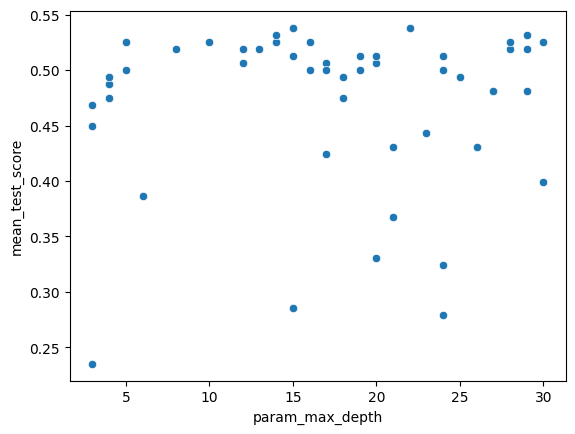

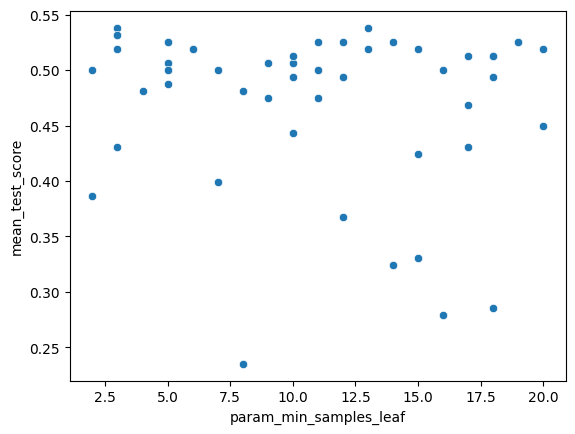

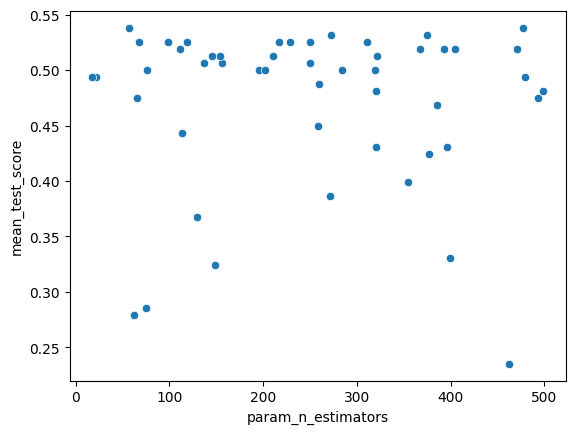

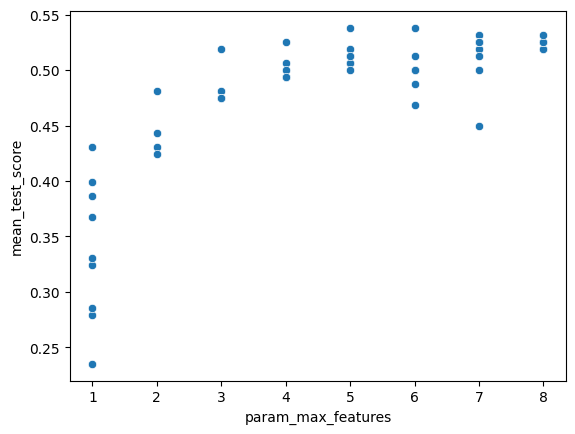

In [239]:
rand1_columns = ["param_max_depth", "param_min_samples_leaf", "param_n_estimators", "param_max_features"]

for col in rand1_columns:
    sns.scatterplot(data = rand1_df, x = col, y = rand1_df["mean_test_score"])
    plt.show()

In [240]:
random_search_predictions = rand_cv_rf.predict(X_test)

# Random search best_estimator_ results

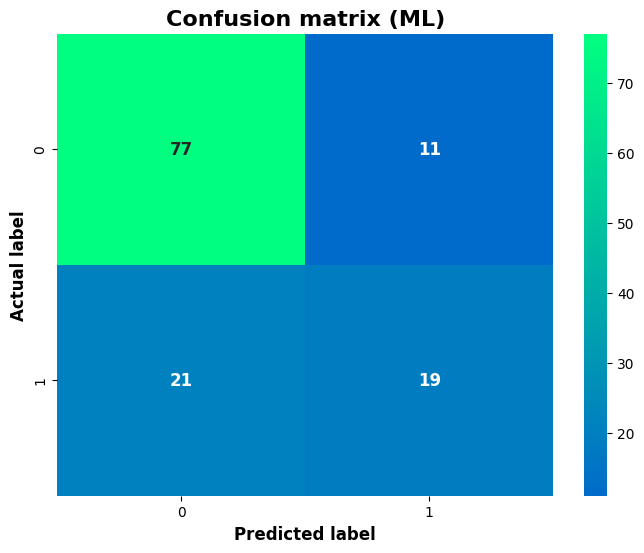

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        88
           1       0.63      0.47      0.54        40

    accuracy                           0.75       128
   macro avg       0.71      0.68      0.69       128
weighted avg       0.74      0.75      0.74       128



In [241]:
fig, ax = plt.subplots(figsize = (8, 6))
cm = confusion_matrix(y_true=y_test, y_pred=random_search_predictions)
sns.heatmap(
    data = cm, 
    cmap="winter", 
    center = 20, 
    annot=True, 
    annot_kws = {
        "fontsize":12, 
        "fontweight":"bold"
        },
    ax = ax
    )
plt.title(
    "Confusion matrix (ML)",
    fontsize = 16,
    fontweight = "bold"
    )
plt.xlabel(
    "Predicted label",
    fontsize = 12,
    fontweight = "bold"
    )
plt.ylabel(
    "Actual label",
    fontsize = 12,
    fontweight = "bold"
    )
fig.savefig("RandomGridSearch_RFC_ConfusionMatrix.png")
plt.show()

# Report
print(classification_report(y_test, random_search_predictions))

### Grid search

In [242]:
grid_search_params = {
    "max_depth" : [5, 7, 9],
    "min_samples_leaf" : [3, 5],
    "n_estimators" : [80, 90],
    "max_features" : [5, 7]
}

In [243]:
grid_cv_rf = GridSearchCV(
    estimator=RandomForestClassifier(criterion="entropy", random_state=777),
    param_grid=grid_search_params,
    n_jobs=8,
    refit="recall",
    verbose=0,
    cv = 5,
    return_train_score=True,
    scoring=scorer
    )

In [244]:
grid_cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=777),
             n_jobs=8,
             param_grid={'max_depth': [5, 7, 9], 'max_features': [5, 7],
                         'min_samples_leaf': [3, 5], 'n_estimators': [80, 90]},
             refit='recall', return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict'))

In [245]:
grid_search_predictions = grid_cv_rf.predict(X_test)

# Grid search best_estimator_ results

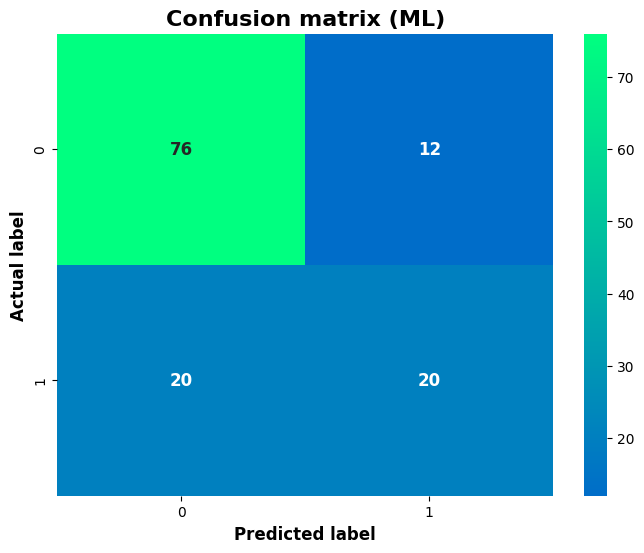

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        88
           1       0.62      0.50      0.56        40

    accuracy                           0.75       128
   macro avg       0.71      0.68      0.69       128
weighted avg       0.74      0.75      0.74       128



In [246]:
fig, ax = plt.subplots(figsize = (8, 6))
cm = confusion_matrix(y_true=y_test, y_pred=grid_search_predictions)
sns.heatmap(
    data = cm, 
    cmap="winter", 
    center = 20, 
    annot=True, 
    annot_kws = {
        "fontsize":12, 
        "fontweight":"bold"
        },
    ax = ax
    )
plt.title(
    "Confusion matrix (ML)",
    fontsize = 16,
    fontweight = "bold"
    )
plt.xlabel(
    "Predicted label",
    fontsize = 12,
    fontweight = "bold"
    )
plt.ylabel(
    "Actual label",
    fontsize = 12,
    fontweight = "bold"
    )
fig.savefig("GridSearch_RFC_ConfusionMatrix.png")
plt.show()

# Report
print(classification_report(y_test, grid_search_predictions))

### Runtime

In [247]:
# Time end and total time
end = time.time()

# Total runtime
print(f'Total runtime: {end-start:.3f} s')

Total runtime: 9.089 s
